<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Analyzing a real world data-set with SQL and Python

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

-   Understand a dataset of selected socioeconomic indicators in Chicago
-   Learn how to store data in an Db2 database on IBM Cloud instance
-   Solve example problems to practice your SQL skills


## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork-20127838&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), but to summarize, the dataset has the following variables:

-   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

-   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

-   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

-   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

-   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

-   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

-   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

-   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

-   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [1]:
%load_ext sql

In [2]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below
# i.e. copy after db2:// from the URI string in Service Credentials of your Db2 instance. Remove the double quotes at the end.
%sql ibm_db_sa://pzx45946:rcw%2Bxwwxmz7655d9@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB

'Connected: pzx45946@BLUDB'

### Store the dataset in a Table

##### In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.

##### We will first read the dataset source .CSV from the internet into pandas dataframe

##### Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table


In [3]:
import pandas
'''chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data'''

"chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')\n%sql PERSIST chicago_socioeconomic_data"

##### You can verify that the table creation was successful by making a basic query like:


In [4]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?


In [5]:
%sql select count(*) from chicago_socioeconomic_data;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

Correct answer: 78
```

</details>


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?


In [6]:
%sql select count(community_area_name) as Numbers_of_community from chicago_socioeconomic_data where hardship_index > 50;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


numbers_of_community
38


<details><summary>Click here for the solution</summary>

```python
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0;

Correct answer: 38
```

</details>


### Problem 3

##### What is the maximum value of hardship index in this dataset?


In [7]:
%sql select max(hardship_index) from chicago_socioeconomic_data;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

Correct answer: 98.0
```

</details>


### Problem 4

##### Which community area which has the highest hardship index?


In [8]:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index in (select max(hardship_index)from chicago_socioeconomic_data);

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


<details><summary>Click here for the solution</summary>

```python
#We can use the result of the last query to as an input to this query:
%sql SELECT community_area_name FROM chicago_socioeconomic_data where hardship_index=98.0

#or another option:
%sql SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY hardship_index DESC NULLS LAST FETCH FIRST ROW ONLY;

#or you can use a sub-query to determine the max hardship index:
%sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) 

Correct answer: 'Riverdale'
    
```

</details>


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [9]:
%sql select community_area_name, per_capita_income_ from chicago_socioeconomic_data where per_capita_income_ > 60000 order by per_capita_income_;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name,per_capita_income_
Lake View,60058
Loop,65526
Lincoln Park,71551
Near North Side,88669


In [10]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


<details><summary>Click here for the solution</summary>

```python
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000;

Correct answer:Lake View,Lincoln Park, Near North Side, Loop
    
```

</details>


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


 * ibm_db_sa://pzx45946:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


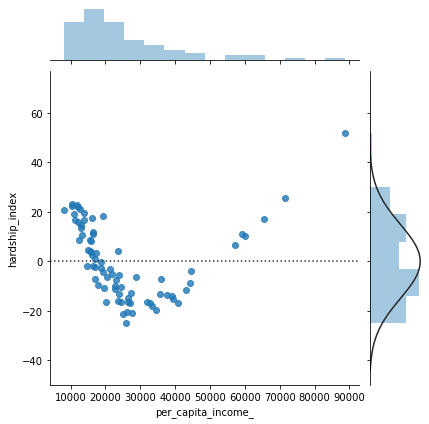

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


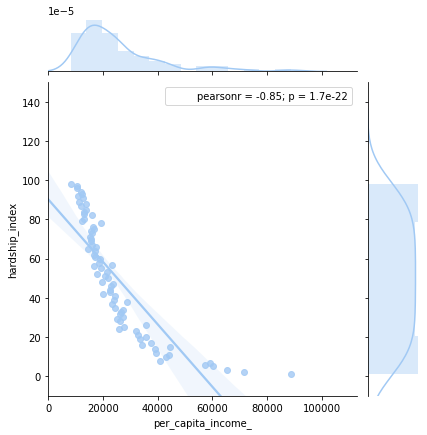

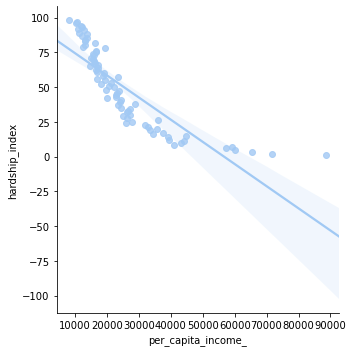

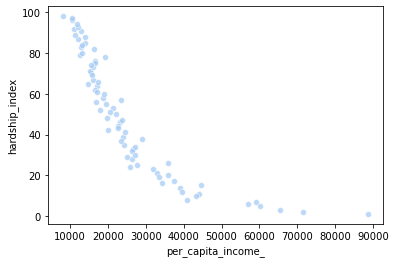

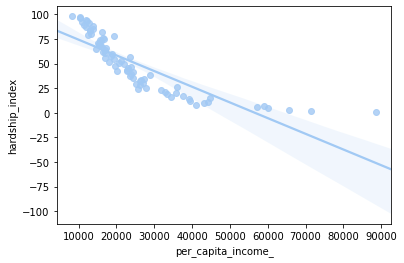

In [11]:
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import pandas as pd
df = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data;
#plot = sns.set_palette('pastel')
plta = sns.jointplot(x='per_capita_income_', y ='hardship_index', data=df.DataFrame(), kind='resid', stat_func = pearsonr)
plt.show()
plot = sns.set_palette('pastel')
plta = sns.jointplot(x='per_capita_income_', y ='hardship_index', data=df.DataFrame(), kind='reg', stat_func = pearsonr)
plt.ylim(-10,)
plt.xlim(0,)
plt.show()
pltb = sns.lmplot(x='per_capita_income_', y ='hardship_index', data=df.DataFrame())
plt.show()
pltc = sns.scatterplot(x='per_capita_income_', y ='hardship_index', data=df.DataFrame(), alpha = 0.7)
plt.show()
pltc = sns.regplot(x='per_capita_income_', y ='hardship_index', data=df.DataFrame())
plt.show()

<details><summary>Click here for the solution</summary>

```python
# if the import command gives ModuleNotFoundError: No module named 'seaborn'
# then uncomment the following line i.e. delete the # to install the seaborn package 
# !pip install seaborn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 
    
```

</details>


### Conclusion

##### Now that you know how to do basic exploratory data analysis using SQL and python visualization tools, you can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`. Try to create interesting visualizations!


## Summary

##### In this lab you learned how to store a real world data set from the internet in a database (Db2 on IBM Cloud), gain insights into data using SQL queries. You also visualized a portion of the data in the database to see what story it tells.


## Author

<a href="https://www.linkedin.com/in/ravahuja/" target="_blank">Rav Ahuja</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2020-08-28        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
